# Qunatum optimal control example 2

This is an example code for qunatum optimal of two control parameters. you can choose any Hamiltonian you want but with only one control parameter. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qoct2ctrl import QH, QOCT
%matplotlib inline

Start with some initial conditions of Hamiltonian matrix and an initial control parameter.

In [6]:
H0 = np.matrix([[1,1],[1,-1]])
Hctr = [[1,0],[0,-1]]
Hctr2 = [[1,0],[0,-1]]
ctrl = 0.*np.ones(1000)
ctrl2 = 0.*np.ones(1000)

norm = lambda x: np.sqrt(sum(np.array(x)**2)) 
phi_i = [[1],[np.sqrt(2)-1]]
phi_i = phi_i / norm(phi_i)

Call QH module to build up equation of motion and states.

In [7]:
qh_test = QH(H0, Hctr, ctrl, Hctr2, ctrl2, phi_i)
time = qh_test.real_tim
phi = qh_test.phi_t()

Here we can show our first figure of probability variation in time.

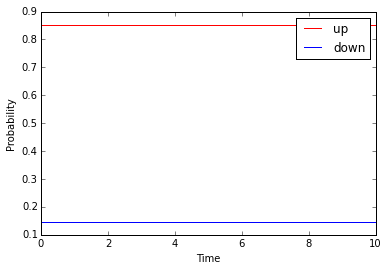

In [8]:
prob = qh_test.prob_t(phi)
plt.plot(time, prob[:,0,:],'r',label = 'up')
plt.plot(time, prob[:,1,:],'b',label = 'down')
plt.xlabel('Time')
plt.ylabel('Probability')
plt.legend()
plt.show()

You can find the probability will stay at original state since I choose eigenstate to begin, and with a small variation cause by ctrl_i. 

Given the goal state we want and previous qh_test class into QOCT module to calculate optimal control pulse.

IterTime: 1,   Error: [[ 0.88578539]],   TotTime: 1.807371,   AvgTime: 1.807375
IterTime: 2,   Error: [[ 0.72104662]],   TotTime: 3.620334,   AvgTime: 1.810169
IterTime: 3,   Error: [[ 0.76487602]],   TotTime: 5.543204,   AvgTime: 1.847736
IterTime: 4,   Error: [[ 0.81362962]],   TotTime: 7.428289,   AvgTime: 1.857073
IterTime: 5,   Error: [[ 0.86817358]],   TotTime: 9.474327,   AvgTime: 1.8948662
IterTime: 6,   Error: [[ 0.92925209]],   TotTime: 11.513056,   AvgTime: 1.91884333333
IterTime: 7,   Error: [[ 0.99513972]],   TotTime: 13.717709,   AvgTime: 1.95967314286
IterTime: 8,   Error: [[ 0.92731084]],   TotTime: 16.086352,   AvgTime: 2.0107945
IterTime: 9,   Error: [[ 0.84655047]],   TotTime: 18.615059,   AvgTime: 2.06834033333
IterTime: 10,   Error: [[ 0.76210211]],   TotTime: 21.141709,   AvgTime: 2.1141712
IterTime: 11,   Error: [[ 0.67708455]],   TotTime: 23.671912,   AvgTime: 2.15199236364
IterTime: 12,   Error: [[ 0.59500721]],   TotTime: 26.289105,   AvgTime: 2.19075916667
It

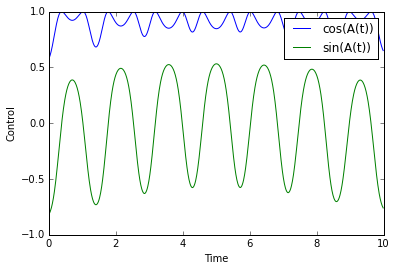

In [10]:
phi_g = [[np.sqrt(2)-1],[-1]]
phi_g = phi_g / norm(phi_g) 
qh_test.ctrl = .9*np.ones(1000)
qh_test.ctrl2 = .1*np.ones(1000)
qoct_test = QOCT(qh_test, phi_g)
ctrl_test, ctrl2_test = qoct_test.run()
plt.plot(time[:-1], ctrl_test,label = 'cos(A(t))')
plt.plot(time[:-1], ctrl2_test, label = 'sin(A(t))')
plt.xlabel('Time')
plt.ylabel('Control')
plt.legend()
plt.show()

and probability variation in time.

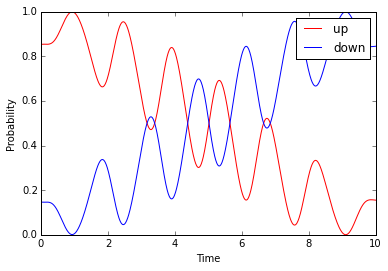

In [11]:
phi_new = qh_test.phi_t()
prob_new = qh_test.prob_t(phi_new)

plt.plot(time, prob_new[:,0,:],'r',label = 'up')
plt.plot(time, prob_new[:,1,:],'b', label = 'down')
plt.xlabel('Time')
plt.ylabel('Probability')
plt.legend()
plt.show()

Following we consider a long time variation of probability and control comes in the middle time.

In [15]:
lon = np.size(ctrl_test)
ctrl_lon = np.zeros(3*lon)
ctrl_lon[lon:2*lon ] = ctrl_test[:]
ctrl2_lon = np.zeros(3*lon)
ctrl2_lon[lon:2*lon ] = ctrl2_test[:]

One can plot the probability variation again.

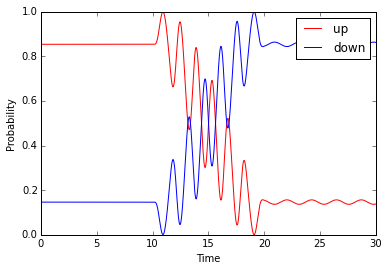

In [16]:
qh_test2 = QH(H0, Hctr, ctrl_lon, Hctr2, ctrl2_lon, phi_i)
time2 = qh_test2.real_tim
phi2 = qh_test2.phi_t()

prob2 = qh_test2.prob_t(phi2)
plt.plot(time2, prob2[:,0,:],'r',label = 'up')
plt.plot(time2, prob2[:,1,:],'b', label = 'down')
plt.xlabel('Time')
plt.ylabel('Probability')
plt.legend()
plt.show()

The end.